In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal
plt.style.use('science')
plt.style.use('notebook')
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

In [2]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"


In [3]:
rcb_stars = ["IRAS18135", "NSV11154","ASAS-RCB-18", "WISEJ1942", "WISE222", "AOHer", "ASAS-RCB-21", "VCrA"]
rcb_data = {}
for star in rcb_stars:
    if rcb_stars.index(star) > -1:
        # check if star_clean.txt exists, otherwise load star.txt
        try:
            observed_file = f"{observed_path}/{star}_clean.txt"
            observed_data = np.loadtxt(observed_file, unpack=True)
        except:
            observed_file = f"{observed_path}/{star}.txt"
            observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        fs = 1/(obs_flux[1000] - obs_flux[999])
        fs = 100000
        fc = 18000  # Cut-off frequency of the filter
        w = fc / (fs / 2) # Normalize the frequency
        try:
            b, a = signal.butter(5, w, 'low')
            obs_flux = signal.filtfilt(b, a, obs_flux)
            obs_err = signal.filtfilt(b, a, obs_err)
        except:
            print(f"Failed to filter {star}")
            print(fs)
        rcb_data[star] = [obs_wave/1e4, obs_flux, obs_err]


In [4]:
wave, flux, err = rcb_data[star]
cont_regions = np.where(np.logical_and(flux<1.1, flux>0.95))

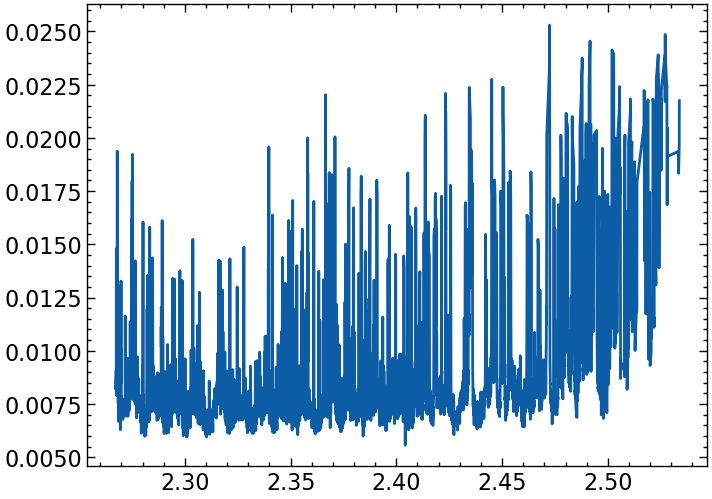

In [5]:
plt.plot(wave[cont_regions], err[cont_regions]/flux[cont_regions])

IRAS18135 149.0
NSV11154 87.0
ASAS-RCB-18 79.0
WISEJ1942 98.0
WISE222 68.0
AOHer 88.0
ASAS-RCB-21 81.0
VCrA 136.0


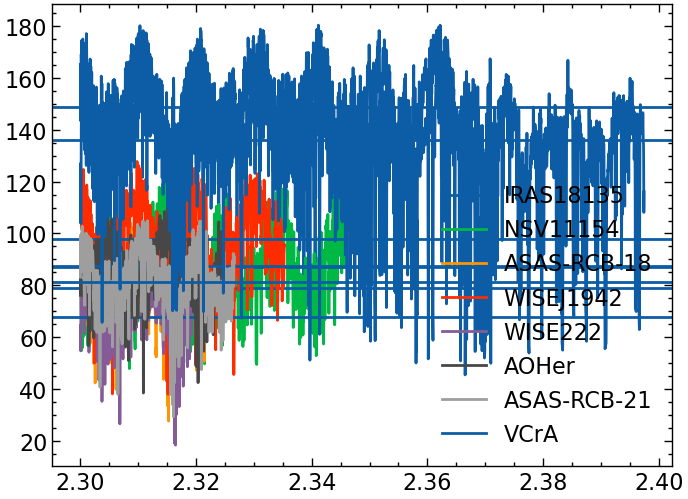

In [6]:
for star in rcb_stars:
    wave, flux, err = rcb_data[star]
    mask = (wave > 2.3) & (wave < 2.4)
    wave, flux, err = wave[mask], flux[mask], err[mask]
    cont_regions = np.where(np.logical_and(flux<1.05, flux>0.9))[0]
    cont_regions = np.where(np.logical_and(cont_regions, wave[cont_regions]>2.3))[0]
    plt.plot(wave[cont_regions], flux[cont_regions]/err[cont_regions], label = star)
    plt.axhline(np.median(flux[cont_regions]/err[cont_regions]))
    print(star, (np.median(flux[cont_regions]/err[cont_regions])).round(0) )
plt.legend()
# plt.ylim(10,150)
# plt.xlim(2.3, 2.4)

In [43]:
hdc_stars = ["HD182040", "B42","C38",  "A223", "B566", "HD137613"]
hdc_data = {}
for star in hdc_stars:
    if hdc_stars.index(star) > -1:
        try:
            observed_file = f"{observed_path}/{star}_clean.txt"
            observed_data = np.loadtxt(observed_file, unpack=True)
        except:
            observed_file = f"{observed_path}/{star}.txt"
            observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        # fs = 1/(obs_flux[1000] - obs_flux[999])
        # fs = 100000
        # fc = 12000  # Cut-off frequency of the filter
        # w = fc / (fs / 2) # Normalize the frequency
        # try:
        #     b, a = signal.butter(5, w, 'low')
        #     obs_flux = signal.filtfilt(b, a, obs_flux)
        #     obs_err = signal.filtfilt(b, a, obs_err)
        # except:
        #     print(f"Failed to filter {star}")
        #     print(fs)
        hdc_data[star] = [obs_wave/1e4, obs_flux, obs_err]

In [44]:
hdc_data['B42']

[array([2.25520048, 2.25520987, 2.25521925, ..., 2.52075111, 2.52076112,
        2.52077112]),
 array([1.0591, 1.0607, 1.0624, ..., 0.9942, 1.0244, 1.0824]),
 array([0.1621, 0.1632, 0.1628, ..., 0.0867, 0.0841, 0.0846])]

HD182040 108.0
B42 32.0
C38 73.0
A223 127.0
B566 78.0
HD137613 104.0


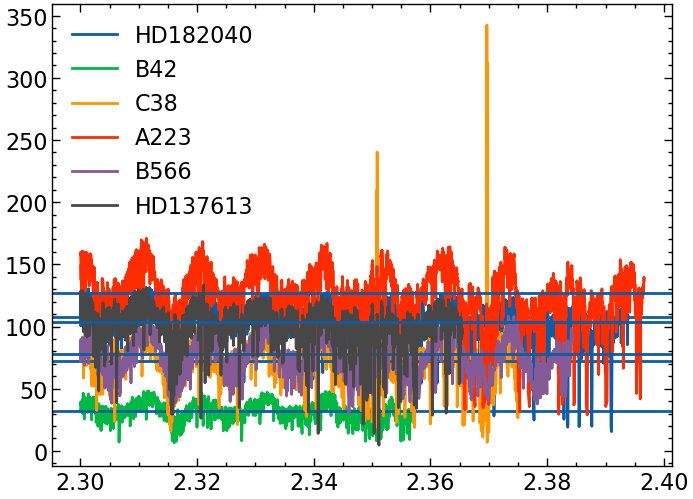

In [45]:
for star in hdc_stars:
    wave, flux, err = hdc_data[star]
    mask = (wave > 2.3) & (wave < 2.4)
    wave, flux, err = wave[mask], flux[mask], err[mask]
    cont_regions = np.where(np.logical_and(flux<1.05, flux>0.8))[0]
    cont_regions = np.where(np.logical_and(cont_regions, wave[cont_regions]>2.3))[0]
    plt.plot(wave[cont_regions], flux[cont_regions]/err[cont_regions], label = star)
    plt.axhline(np.median(flux[cont_regions]/err[cont_regions]))
    print(star, (np.median(flux[cont_regions]/err[cont_regions])).round(0) )
plt.legend()
# plt.ylim(10,150)
# plt.xlim(2.3, 2.4)

In [1]:
def vac2air(wave):
    # Convert vacuum to air wavelengths
    # https://www.astro.uu.se/valdwiki/Air-to-vacuum%20conversion
    s = 1e4/wave
    n = 1 + 0.0000834254 + 0.02406147 / (130 - s**2) + 0.00015998 / (38.9 - s**2)
    return wave/n

In [5]:
f = np.loadtxt("/home/advait/Desktop/research/rcb-project/TSFitPy/input_files/linelists/C2/C2_10000-30000_sort.vald_up-to-2.5um_loggfSup-7", comments = "'")

In [6]:
f

array([[ 3.3333620e+03,  2.3060000e+00, -5.0220000e+00,  0.0000000e+00,
         8.9000000e+01,  0.0000000e+00],
       [ 3.3333690e+03,  1.0850000e+00, -6.1150000e+00,  0.0000000e+00,
         3.1000000e+01,  0.0000000e+00],
       [ 3.3333720e+03,  1.7240000e+00, -4.9970000e+00,  0.0000000e+00,
         8.5000000e+01,  0.0000000e+00],
       ...,
       [ 2.4999794e+04,  3.6780000e+00, -2.7040000e+00,  0.0000000e+00,
         1.6500000e+02,  0.0000000e+00],
       [ 2.4999819e+04,  3.0300000e-01, -3.1490000e+00,  0.0000000e+00,
         2.5000000e+01,  0.0000000e+00],
       [ 2.4999931e+04,  3.4380000e+00, -3.1390000e+00,  0.0000000e+00,
         5.7000000e+01,  0.0000000e+00]])

In [9]:
wavelengths = f[:,0]
wavelengths_air = vac2air(wavelengths)

In [8]:
wavelengths

array([ 3333.362,  3333.369,  3333.372, ..., 24999.794, 24999.819,
       24999.931])

In [10]:
wavelengths_air

array([ 3332.4034983 ,  3332.41049652,  3332.41349576, ...,
       24992.9741347 , 24992.99912789, 24993.11109739])

In [11]:
f[:,0] = wavelengths_air
# save to new file
np.savetxt("/home/advait/Desktop/research/rcb-project/TSFitPy/input_files/linelists/C2/C2_10000-30000_sort.vald_up-to-2.5um_loggfSup-7_air", f, fmt = "%0.6f", delimiter = "    ")